In [1]:
# Cell loads the data

from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
from sklearn import preprocessing
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'

"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)

# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
#g_comp=5
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=5
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

2
3


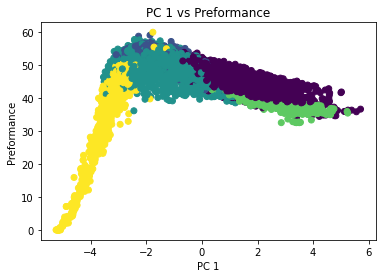

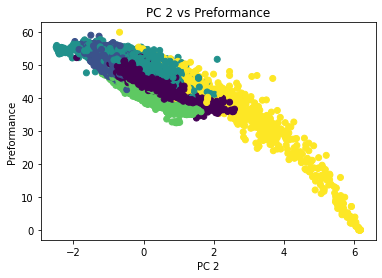

NameError: name 'average_val' is not defined

In [3]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_gausian_fit
var=.9
g_comp=5
pc1,pc2,color=make_pca_gausian_fit(1,test,var,g_comp,array_out=True)
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.show()
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
# Notice that the clusters are verticle..
# mean cluster analysis (colors do not match above yet)
ave_by_c=average_val.groupby(by="Cluster").mean()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC1"],ave_by_c["H2@100 bar/77K (g/L)"])
plt.show()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC2"],ave_by_c["H2@100 bar/77K (g/L)"])

In [51]:
# Cell loads the data
from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'
"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)
data = data.reset_index(drop=True)
# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=6
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

In [4]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_agg_fit
from sklearn.cluster import AgglomerativeClustering
var=.9
_,_,color=make_pca_agg_fit(1,test,var,g_comp,array_out=True)

# Notice that the clusters are verticle..

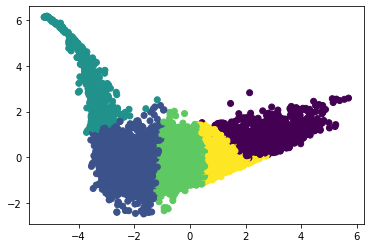

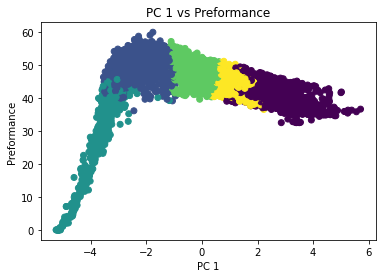

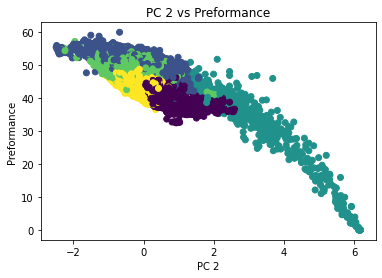

In [52]:
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()

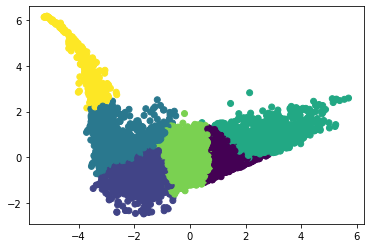

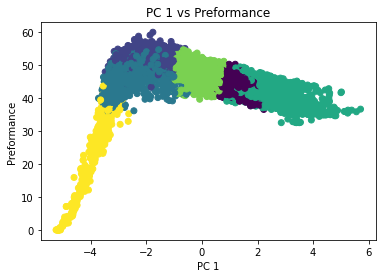

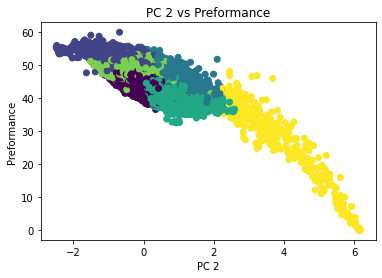

In [53]:
from sklearn.cluster import KMeans
_,_,color=make_pca_agg_fit(1,test,var,g_comp,func_give=KMeans,array_out=True)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()

In [1]:
Out=PCA(n_components=2)
g=Out.fit(test)
data2=data.copy()
holder=['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
for i in holder:
    temp=data2[holder]
    g=preprocessing.StandardScaler().fit_transform(temp)
    g=pd.DataFrame(g)
pc1,pc2,color=make_pca_agg_fit(1,g,var,g_comp,func_give=KMeans,array_out=True)
dic={
    "Pc1" : pc1,
    "Pc2" : pc2,
    "Cluster" : color,
}
holder=pd.DataFrame(dic)
data2=pd.concat([data2,holder],axis=1)
plt.scatter(data2["Pc1"],data2["Pc2"],c=data2["Cluster"])
data2.columns
abridge=data2[['MOF ID', 'void fraction', 'Vol. S.A.', 'Grav. S.A.','Pore diameter Limiting', 'Pore diameter Largest','topology',
       'First nodular symmetry code', 'First nodular character',
       'First nodular ID', 'Second nodular symmetry code',
       'Second nodular character', 'Second nodular ID',
       'Connecting building block ID', 'Pc1', 'Pc2', 'Cluster']]
new=data2[['MOF ID', 'void fraction', 'Vol. S.A.', 'Grav. S.A.','Pore diameter Limiting', 'Pore diameter Largest','topology',
       'First nodular symmetry code', 'First nodular character',
       'First nodular ID', 'Second nodular symmetry code',
       'Second nodular character', 'Second nodular ID',
       'Connecting building block ID', 'Pc1', 'Pc2', 'Cluster']].groupby("Cluster").mean()
#plt.scatter(new["Pc1"],new["Pc2"],c="r")
annotations=["C0","C1","C2","C3","C4","C5"]
for i, label in enumerate(annotations):
    plt.annotate(label, (new["Pc1"][i],new["Pc2"][i]),weight='bold',c="r")

NameError: name 'PCA' is not defined

In [230]:
for i in abridge["topology"].unique():
    dic[i]=[]
for i in range(6):
    Cluster1=abridge[abridge["Cluster"]==i]
    for j in abridge["topology"].unique():
        if sum(Cluster1["topology"]==j) > 0:
            dic[j].append(sum(Cluster1["topology"]==j))
        else:
            dic[j].append(0)


In [246]:
Cluster1

,MOF ID,void fraction,Vol. S.A.,Grav. S.A.,Pore diameter Limiting,Pore diameter Largest,topology,First nodular symmetry code,First nodular character,First nodular ID,Second nodular symmetry code,Second nodular character,Second nodular ID,Connecting building block ID,Pc1,Pc2,Cluster
57,58,0.42,612,384.0,4.2,5.8,bcs,16,metaliic,14,16,metallic,14,1.0,-3.746273,3.419055,5
68,69,0.40,476,303.0,4.5,5.6,bcs,16,metaliic,14,16,metallic,14,2.0,-3.724805,3.721612,5
79,80,0.51,1166,837.0,5.1,6.0,bcs,16,metaliic,14,16,metallic,14,3.0,-3.703743,2.157626,5
91,92,0.50,1128,938.0,6.8,7.7,bcs,16,metaliic,14,16,metallic,14,7.0,-3.544039,2.294885,5
94,95,0.09,0,0.0,2.0,3.7,bcs,16,metaliic,6,16,metallic,6,10.0,-4.718806,5.804377,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9625,9633,0.41,714,363.0,4.3,6.9,soc,5,organic,9,9,metallic,5,0.0,-3.816320,3.343720,5
11107,11115,0.46,903,702.0,8.2,8.8,ssb,5,metaliic,2,5,organic,10,0.0,-3.456799,2.885932,5
12157,12165,0.47,783,428.0,3.6,7.8,tbo,3,organic,0,5,metallic,2,0.0,-3.638659,2.954690,5
12541,12549,0.44,734,350.0,5.0,7.4,the,3,organic,0,8,metallic,7,0.0,-3.675637,3.200872,5


In [253]:
for i in range(6):
    Cluster1=abridge[abridge["Cluster"]==i]
    Cluster1.rename({"MOF ID":})
    Cluster1.groupby("topology").count()["MOF ID"].plot.pie(y=f"Cluser {i}")
    plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_9096/3128845360.py, line 3)

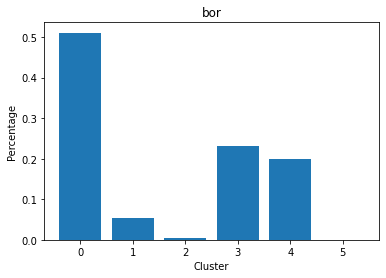

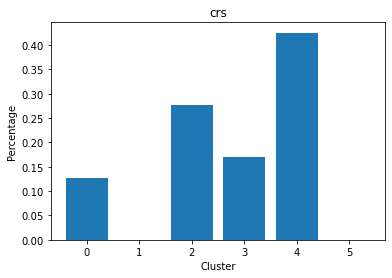

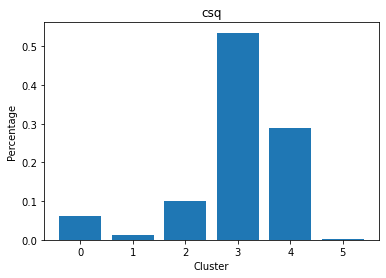

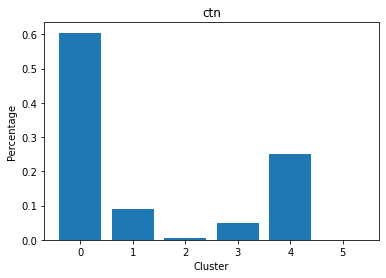

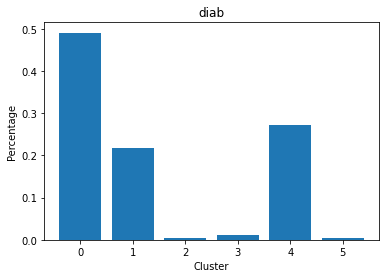

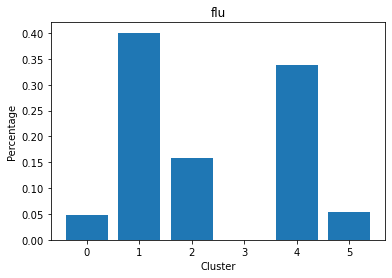

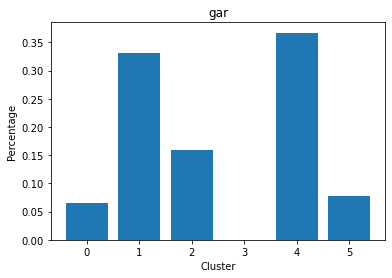

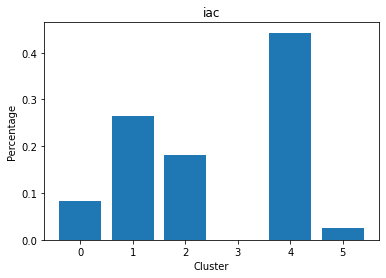

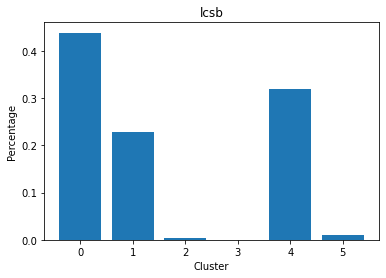

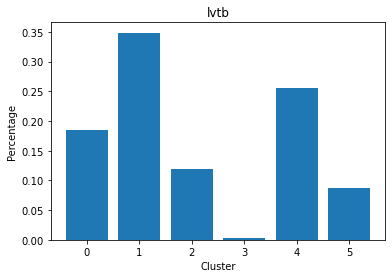

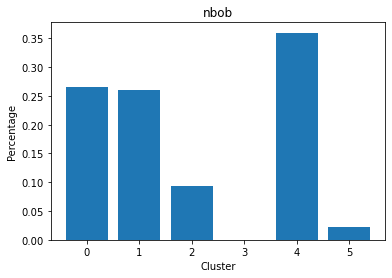

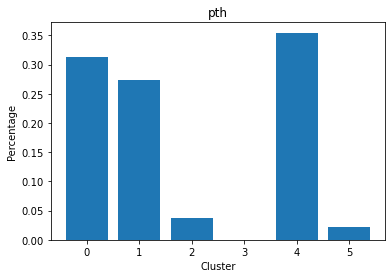

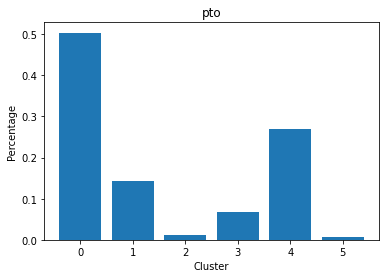

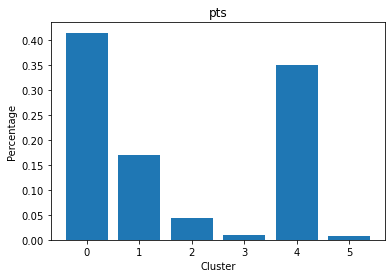

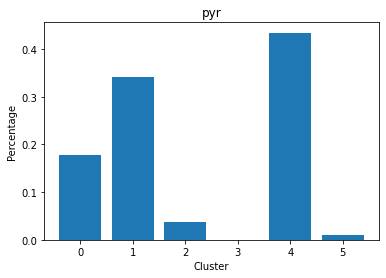

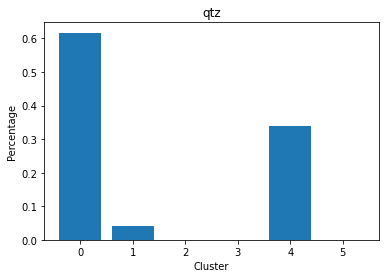

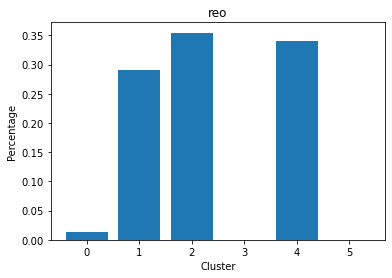

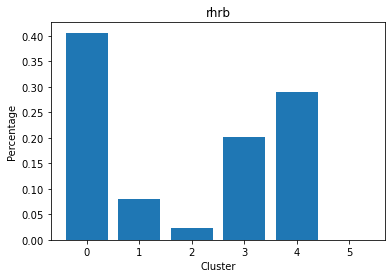

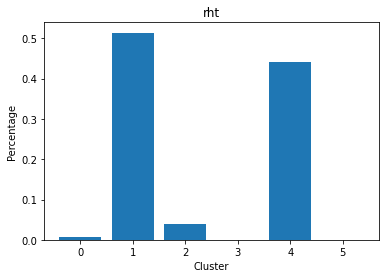

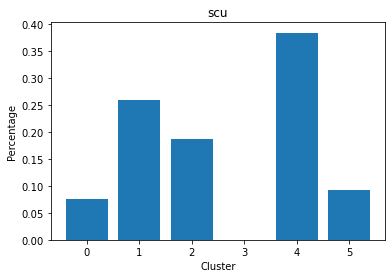

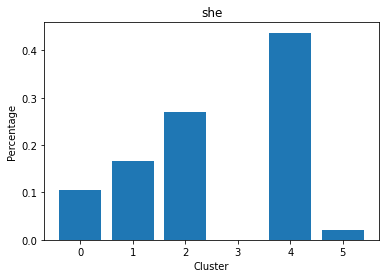

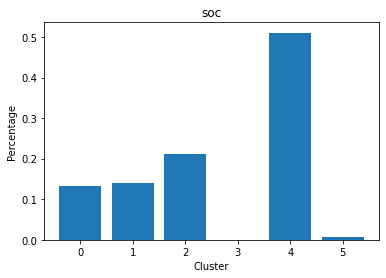

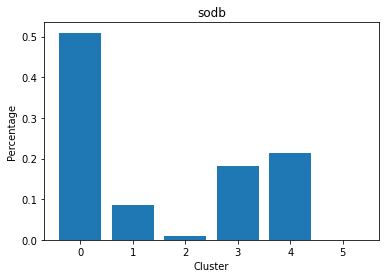

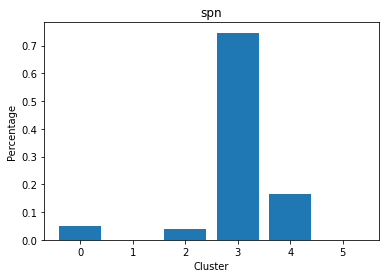

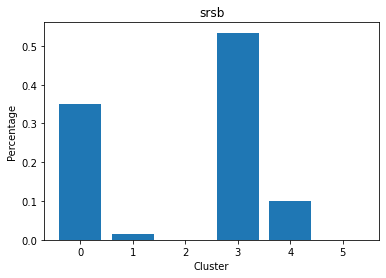

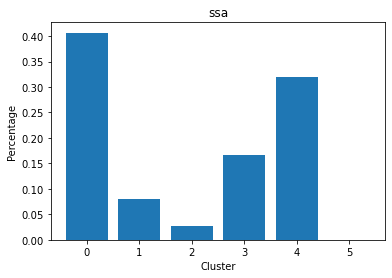

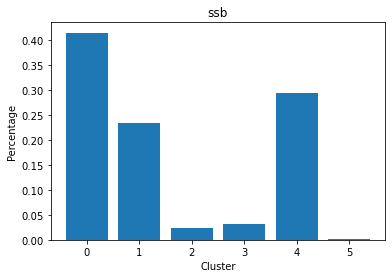

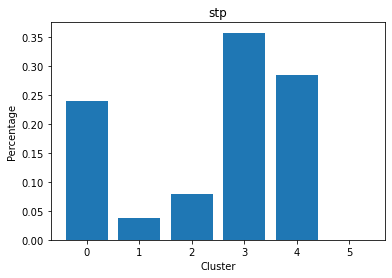

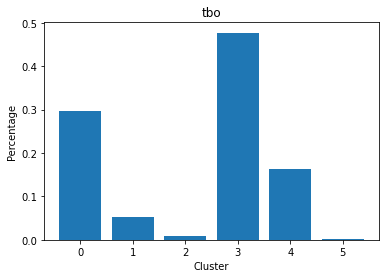

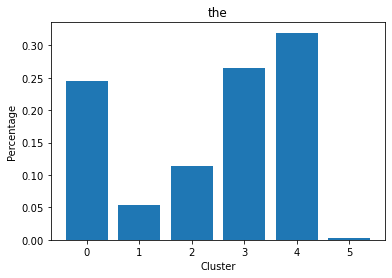

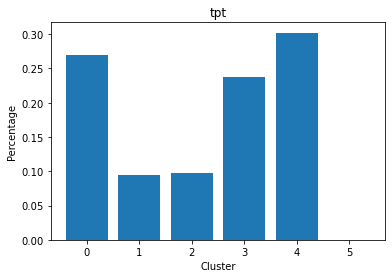

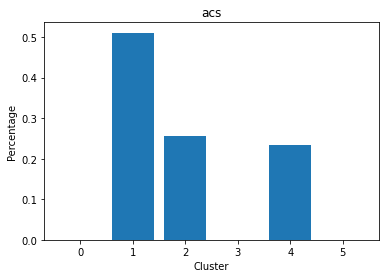

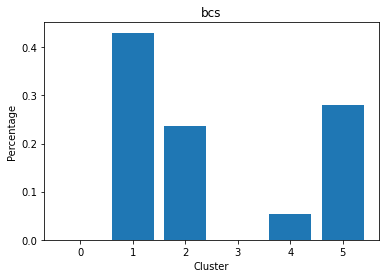

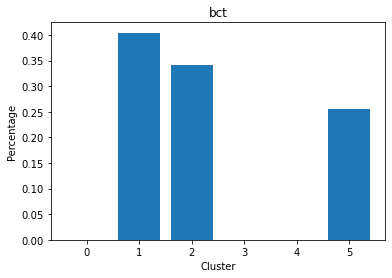

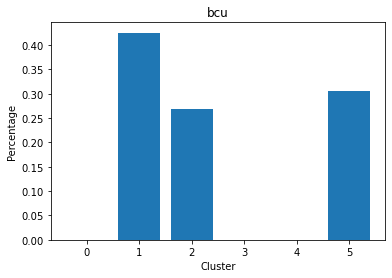

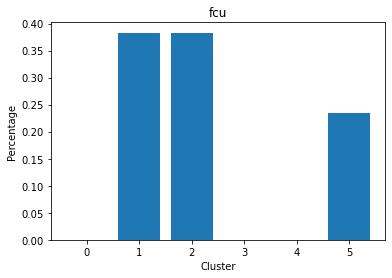

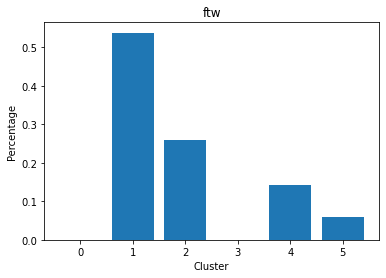

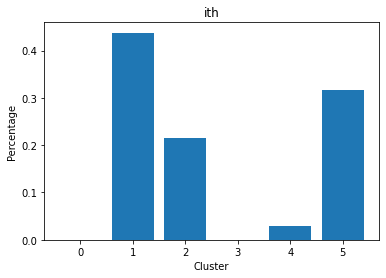

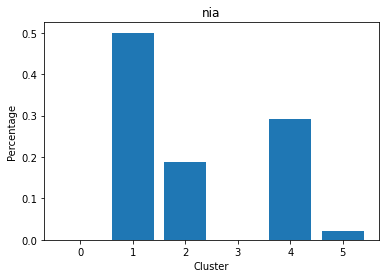

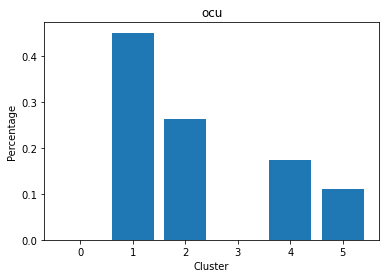

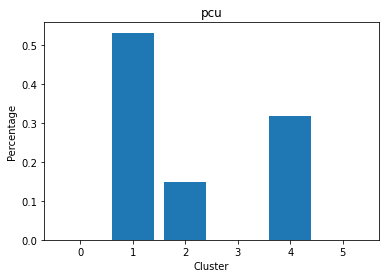

In [228]:
for i in dic:
    dic[i]=np.array(dic[i])
    dic[i]=dic[i]/sum(dic[i])
    plt.bar([0,1,2,3,4,5],dic[i])
    plt.title(i)
    plt.ylabel("Percentage")
    plt.xlabel("Cluster")
    plt.show()

{'bor': array([0.51054852, 0.05274262, 0.00421941, 0.23206751, 0.20042194,
        0.        ]),
 'crs': array([0.12765957, 0.        , 0.27659574, 0.17021277, 0.42553191,
        0.        ]),
 'csq': array([0.06055646, 0.01145663, 0.09983633, 0.53518822, 0.28968903,
        0.00327332]),
 'ctn': array([0.60465116, 0.09090909, 0.00422833, 0.04862579, 0.25158562,
        0.        ]),
 'diab': array([0.49047619, 0.21666667, 0.0047619 , 0.01190476, 0.27142857,
        0.0047619 ]),
 'flu': array([0.04850214, 0.40085592, 0.15834522, 0.        , 0.33808845,
        0.05420827]),
 'gar': array([0.06510417, 0.33072917, 0.15885417, 0.        , 0.3671875 ,
        0.078125  ]),
 'iac': array([0.08333333, 0.265625  , 0.18229167, 0.        , 0.44270833,
        0.02604167]),
 'lcsb': array([0.43809524, 0.22857143, 0.0047619 , 0.        , 0.31904762,
        0.00952381]),
 'lvtb': array([0.18560606, 0.34848485, 0.11931818, 0.00378788, 0.25568182,
        0.08712121]),
 'nbob': array([0.26515152,